In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
from importlib import reload
import warnings
from pprint import pprint
import string
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import time

plt.style.use('bmh')
from textblob import TextBlob
from cleantext import clean
# mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [21]:
STOPWORDS.update(["a","will","el","del","lo", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo",
 "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au",
 "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais",
 "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois",
 "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez",
 "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "b", "bah", "bas", "basee", "bat", "beau", "beaucoup",
 "bien", "bigre", "bon", "boum", "bravo", "brrr", "c", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là",
 "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain",
 "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun",
 "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine",
 "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables",
 "compris", "concernant", "contre", "couic", "crac", "d", "da", "dans", "de", "debout", "dedans", "dehors", "deja",
 "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels",
 "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different",
 "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement",
 "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit",
 "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début",
 "désormais", "e", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en",
 "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue",
 "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes",
 "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait",
 "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent",
 "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "g", "gens", "h", "ha", "haut", "hein", "hem", "hep",
 "hi", "ho", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé",
 "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "k", "l", "la", "laisser",
 "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque",
 "lui", "lui-meme", "lui-même", "là", "lès", "m", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale",
 "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale",
 "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même",
 "mêmes", "n", "na", "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf",
 "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes",
 "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "o", "oh", "ohé", "ollé", "olé", "on", "ont", "onze",
 "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "o|", "où", "p",
 "paf", "pan", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant",
 "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne",
 "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf",
 "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour",
 "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement",
 "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "q",
 "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième",
 "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui",
 "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable",
 "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "s", "sa",
 "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble",
 "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez",
 "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens",
 "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous",
 "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles",
 "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet",
 "superpose", "sur", "surtout", "t", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement",
 "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi",
 "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres",
 "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "u", "un", "une", "unes",
 "uniformement", "unique", "uniques", "uns", "v", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt",
 "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous",
 "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "w", "x", "y", "z", "zut", "à", "â", "ça", "ès", "étaient", "étais",
 "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"])

In [22]:
warnings.filterwarnings("ignore")

In [23]:
import clean_tweets_dataframe as cld

In [24]:
reload(cld);

In [25]:
import pygsheets

In [26]:
gc = pygsheets.authorize(service_file='tweet-auto-01-833e318c05c8.json')

In [27]:
def translate_pygs():
    sheet = gc.open('make_trans')[0]
    df_trans = df_tweet.query("lang=='fr'| lang =='kiny'")[[
        'original_text', 'cleaned_text', 'lang'
    ]]
    sheet.set_dataframe(df_trans, start='A1', copy_index=True)
    time.sleep(10)
    sheet.update_value('E1', 'translation')
    sheet.update_value('A1', 'index')
    dict_to_translate = df_tweet.query(
        "lang=='fr'| lang =='kiny'")['cleaned_text'].to_dict()
    df_list = sheet.get_all_values(include_tailing_empty=False,
                                   include_tailing_empty_rows=False)
    dd = pd.DataFrame(df_list[1:], columns=df_list[0])
    dd = dd[:len(df_trans)]
    dd['index'] = dd['index'].astype('int')        
    df_tweet.loc[df_trans.index, 'cleaned_text'] = dd.set_index('index')['translation']
    df_tweet.loc[df_trans.index, 'sentiment'] = df_tweet.loc[
        df_trans.index,
        'cleaned_text'].apply(lambda x: 'Positive' if TextBlob(
            clean(x, no_emoji=True)).sentiment.polarity > 0 else
                              ('Negative' if TextBlob(clean(x, no_emoji=True)).
                               sentiment.polarity < 0 else 'Neutral'))

In [28]:
df_tweet=pd.read_excel("week7_processed.xlsx",engine='openpyxl',dtype={'tweet_id':'str'})

In [29]:
cleaner=cld.CleanTweets(df_tweet)

**Using cleaner module from clean_tweets_dataframe to clean the imported dataset**

In [30]:
print(df_tweet.shape)
df_tweet

(17329, 21)


,created_at,original_text,cleaned_text,polarity,subjectivity,sentiment,lang,likes_count,reply_count,retweet_count,...,followers_count,friends_count,possibly_sensitive,hashtags,retweet_hashtags,user_mentions,place,tweet_url,tweet_id,tweet_category
0,2023-01-05 12:04:46,"RT @Hktoday_TV: Considéré comme déstabilisateur de la RDC, P.Kagame dévoile ici son plan dans ces propos:""nous sommes en train de préparer…","Considéré comme déstabilisateur de la RDC, P.Kagame dévoile ici son plan dans ces propos:""nous sommes en train de préparer…",0.000000,0.000000,Neutral,fr,0,0,77,...,0,18,False,NaN,RDF,Hktoday_TV,NaN,https://twitter.com/ndaypatient_m/status/1610970558048378881,1610970558048378881,Retweet
1,2023-01-05 12:04:43,@politicocd Congolese must be very careful with this elections because the terrorists organizations of musevin and kagame refugees may use it to enter government like in Uganda where the looting and killing citizens as well as human body organ trafficking is very hardships,Congolese must be very careful with this elections because the terrorists organizations of musevin and kagame refugees may use it to enter government like in Uganda where the looting and killing citizens as well as human body organ trafficking is very hardships,0.023333,0.466667,Positive,en,0,0,0,...,11,53,False,NaN,RDC,politicocd,"stellenbosch, south africa",https://twitter.com/SemaKatta/status/1610970545624850435,1610970545624850435,Reply
2,2023-01-05 12:04:37,"Iyo uri imbwa ntukenera abatangabuhamya.Byose uyu muhirimbiri yarabyivugiye,umuntu uzashinja Kagame azaba atagira ubwenge kuko byose yarabyivugiye,ibyo yibagiwe Kabarebe yarabimuvugiye. https://t.co/3F7e7forWL","Iyo uri imbwa ntukenera abatangabuhamya.Byose uyu muhirimbiri yarabyivugiye,umuntu uzashinja Kagame azaba atagira ubwenge kuko byose yarabyivugiye,ibyo yibagiwe Kabarebe yarabimuvugiye.",0.000000,0.000000,Neutral,kiny,0,0,0,...,68,9,False,NaN,NaN,NaN,"nairobi, kenya",https://twitter.com/kalisa_louis/status/1610970521717592064,1610970521717592064,Retweet
3,2023-01-05 12:02:00,@MulendaPopol @WambdollS @fatshi13 La corruption et les detournements font la regle dans le 1er cercle du pouvoir du PR05 ..ca aussi vous voulez zapper soit disant on le criminel Kagame veut assassiner Tshilombo..😀😀😀,La corruption et les detournements font la regle dans le 1er cercle du pouvoir du PR05 ..ca aussi vous voulez zapper soit disant on le criminel Kagame veut assassiner Tshilombo..😀😀😀,0.000000,0.000000,Neutral,fr,0,0,0,...,108,743,False,NaN,NaN,"MulendaPopol, WambdollS, fatshi13",NaN,https://twitter.com/CongoParadise/status/1610969862012129280,1610969862012129280,Reply
4,2023-01-05 12:01:08,@wembi_steve You must be very very careful because the terrorists organizations of musevin and kagame refugees are mustered of vote rigging and may use this as am opportunity to enter yr government and the end will be like Uganda where hardships are very day life for citizens,You must be very very careful because the terrorists organizations of musevin and kagame refugees are mustered of vote rigging and may use this as am opportunity to enter yr government and the end will be like Uganda where hardships are very day life for citizens,0.035000,0.650000,Positive,en,0,0,0,...,11,53,False,NaN,RDC,wembi_steve,"stellenbosch, south africa",https://twitter.com/SemaKatta/status/1610969647083388928,1610969647083388928,Reply
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17324,2022-12-29 12:18:18,"#DRCongo\n#KagaM23\n#Kagame\n#M23\n@Presidence_RDC \n@UN\n\nMaj Gen Eric Murokore @RwandaMoD VS his son Moses Mushabe Murokore, a rwandan spy arrested by the Congolese security services. https://t.co/183BZWrWD4","\n\n\n\n \n\n\nMaj Gen Eric Murokore VS his son Moses Mushabe Murokore, a rwandan spy arrested by the Congolese security services.",0.000000,0.000000,Neutral,en,21,4,9,...,2212,349,False,"DRCongo, KagaM23, Kagame, M23",NaN,"Presidence_RDC, UN, RwandaMoD",NaN,https://twitter.com/Big

In [31]:
# Remove texts and authors that are spam and data noise

In [32]:
df_tweet = df_tweet[df_tweet.original_author != 'dwnews']
df_tweet = df_tweet[df_tweet.original_author != '123_INFO_DE']
df_tweet = df_tweet[df_tweet.original_author != 'rogue_corq']
df_tweet = df_tweet[df_tweet.original_author != 'Noticieros_MEX']
df_tweet = df_tweet[df_tweet.original_author != 'EUwatchers']

In [33]:
# drop crypo bots 

# fo week2

# df_tweet=df_tweet[~pd.Series(df_tweet['cleaned_text']).str.contains("The Best Opportunity To Earn Crypto Via Reading")]

In [34]:
# for week 3
df_tweet=df_tweet[~pd.Series(df_tweet['cleaned_text']).str.contains("The Best Opportunity To Earn Crypto Via Reading")]
df_tweet=df_tweet[~pd.Series(df_tweet['original_text']).str.contains("@CryptoTownEU")]
df_tweet=df_tweet[~pd.Series(df_tweet['original_text']).str.contains("Airdrop")]

In [35]:
df_tweet.reset_index(drop=True,inplace=True)

In [36]:
translate_pygs()

###  Export french tweets, make translation and insert back new translated tweets

In [37]:
# df_trans=df_tweet.query("lang=='fr'| lang =='kiny'")[['original_text','cleaned_text','lang']]

### Translation with Google Sheet

In [38]:
# sheet = gc.open('make_trans')[0]

In [39]:
# sheet.set_dataframe(df_trans,start='A1',copy_index=True)

In [40]:
# sheet.update_value('E1','translation')
# sheet.update_value('A1','index')

In [41]:
# Browse the doc and make translations manually
# print(sheet.url)

In [42]:
# dict_to_translate=df_tweet.query("lang=='fr'| lang =='kiny'")['cleaned_text'].to_dict()

In [43]:
# df_list=sheet.get_all_values(include_tailing_empty=False,include_tailing_empty_rows=False)

In [44]:
# dd=pd.DataFrame(df_list[1:],columns=df_list[0])
# dd=dd[:len(df_trans)]
# dd['index']=dd['index'].astype('int')
# dict_translated=dd.set_index('index')[['translation']].to_dict()['translation']

In [45]:
# for idx in dict_to_translate.keys():
#     df_tweet.loc[idx, 'cleaned_text'] = dict_translated[idx]

In [46]:
# for idx in dict_translated.keys():
#     blob = TextBlob(clean(dict_translated[idx], no_emoji=True))
#     pol = blob.sentiment.polarity
#     df_tweet.loc[idx, 'sentiment'] = 'Positive' if pol > 0 else (
#         'Negative' if pol < 0 else 'Neutral')

#### Save new dataframe for dashboard creation

In [47]:
# df_tweet['created_at'] = df_tweet['created_at'].apply(lambda x: x.replace(tzinfo=None))

In [48]:
# df_tweet.to_excel('plotly_dashboard/week7_final.xlsx')

**Now we continue with Tweet and Replies Only! Excluding Retweets**

In [49]:
df_tweet=df_tweet.query("tweet_category=='Tweet' or tweet_category== 'Reply'")

**Most frequent words in our tweets dataset**

In [51]:
english_tweets = df_tweet.copy()

# text Preprocessing
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].apply(
    lambda x: clean(x,
                    no_emoji=True,
                    lower=True,
                    no_punct=True,
                    no_line_breaks=True,
                    strip_lines=True,
                    no_currency_symbols=True))

all_words = ' '.join(english_tweets.cleaned_text.values)

wordcloud_obj = WordCloud(width=1000, height=600,
                          stopwords=STOPWORDS).generate(all_words)

In [ ]:
plt.figure(figsize=(10, 5))
plt.axis('off')
fgg=plt.imshow(wordcloud_obj)
fgg.figure.savefig('plotly_dashboard/cw_rdf_week3.png',bbox_inches='tight',pad_inches=0)

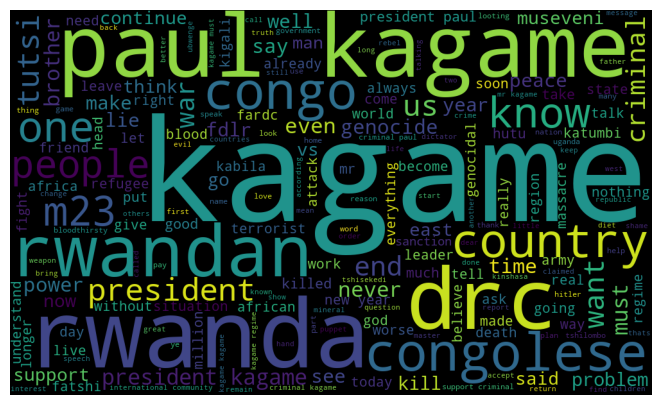

In [54]:
plt.figure(figsize=(10, 5))
plt.axis('off')
fgg=plt.imshow(wordcloud_obj)
# plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [66]:
# fgg.figure.savefig('plotly_dashboard/cw_rdf_week3.png',bbox_inches='tight',pad_inches=0)
# fgg.figure.savefig('plotly_dashboard/assets/cw_rdf_week3.png',bbox_inches='tight',pad_inches=0)

### Topic modeling

In [67]:
def preprocess_data(tweets_df):
    # Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['cleaned_text']]
    word_list = [sent.split() for sent in sentence_list]
    #Save only words and excludes emojis, punctuations
    word_list_new=[]
    for sent in word_list:
        word_list_new.append([re.split(r'\W+',word) for word in sent if word not in STOPWORDS and not word.isdigit()])
    
    word_list_final=[]
    for sent in word_list_new:
        word_list_final.append([i[0] for i in sent])
    # Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list_final)
    corpus_1 = [word_to_id.doc2bow(tweet) for tweet in word_list_final]

    return word_list_final, word_to_id, corpus_1

In [68]:
word_list, id2word, corpus=preprocess_data(english_tweets)

In [69]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)

In [70]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('kagame', 0.05091719),
   ('paul', 0.03748988),
   ('m23', 0.020864194),
   ('criminal', 0.019599427),
   ('killing', 0.01389855),
   ('support', 0.010539001),
   ('africa', 0.010263112),
   ('well', 0.009968851),
   ('must', 0.0083157625),
   ('rwanda', 0.007960305)]),
 (1,
  [('kagame', 0.05258019),
   ('president', 0.024374194),
   ('congo', 0.016982546),
   ('us', 0.016155321),
   ('country', 0.015574516),
   ('know', 0.011470764),
   ('people', 0.010960574),
   ('peace', 0.009622855),
   ('world', 0.007368774),
   ('end', 0.0069346125)]),
 (2,
  [('rwanda', 0.03177243),
   ('kagame', 0.030989258),
   ('drc', 0.022331633),
   ('one', 0.018510493),
   ('congolese', 0.015297266),
   ('tutsi', 0.012062527),
   ('genocide', 0.011626732),
   ('kagames', 0.010730089),
   ('now', 0.010356777),
   ('still', 0.008790698)])]


### Model Analysis

In [ ]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# doc_lda = lda_model[corpus]

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -8.30800771034213


**Model 1 words with some digits, 5 topics**

Perplexity:  -9.857909007134007\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4242327533406264

**Model 2 words without digits, 5 topics**

Perplexity:  -9.82031321033761\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4368570452021986

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

###  END